## Midterm example

### Statistical Inference EE 2102575.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Lab3/main.ipynb)

Instruction. 

You may use the following implementations to answer the questions in the answering sheet.

### Installing packages

In [1]:
# ! pip install numpy 
# ! pip install -U matplotlib
# ! pip install -U scikit-learn

## Import file and preprocessing for Q2-Q4

In this project, we are going to classify an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan taken previously, and many more factors.

Let’s get more into it by looking at the data.

Here we used the data from https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction?resource=download

About the loan_data.csv file:

- Loan_ID: A unique loan ID.

- Gender: Either male or female.

- Married: Weather Married(yes) or Not Marttied(No).

- Dependents: Number of persons depending on the client.

- Education: Applicant Education (graduated or not).

- Self_Employed: Self-employed (Yes/No).

- ApplicantIncome: Applicant income.

- CoapplicantIncome: Co-applicant income.

- LoanAmount: Loan amount in thousands.

- Loan_Amount_Term: Terms of the loan in months.

- Credit_History: Credit history meets guidelines.

- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.

- Loan_Status: Loan approved (Y/N). *** Target ***



In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

 
df = pd.read_csv('loan_data.csv') 
df = df[df.notnull().all(axis=1)]


Feat_List = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
df[Feat_List] = df.loc[:,Feat_List].apply(LabelEncoder().fit_transform)

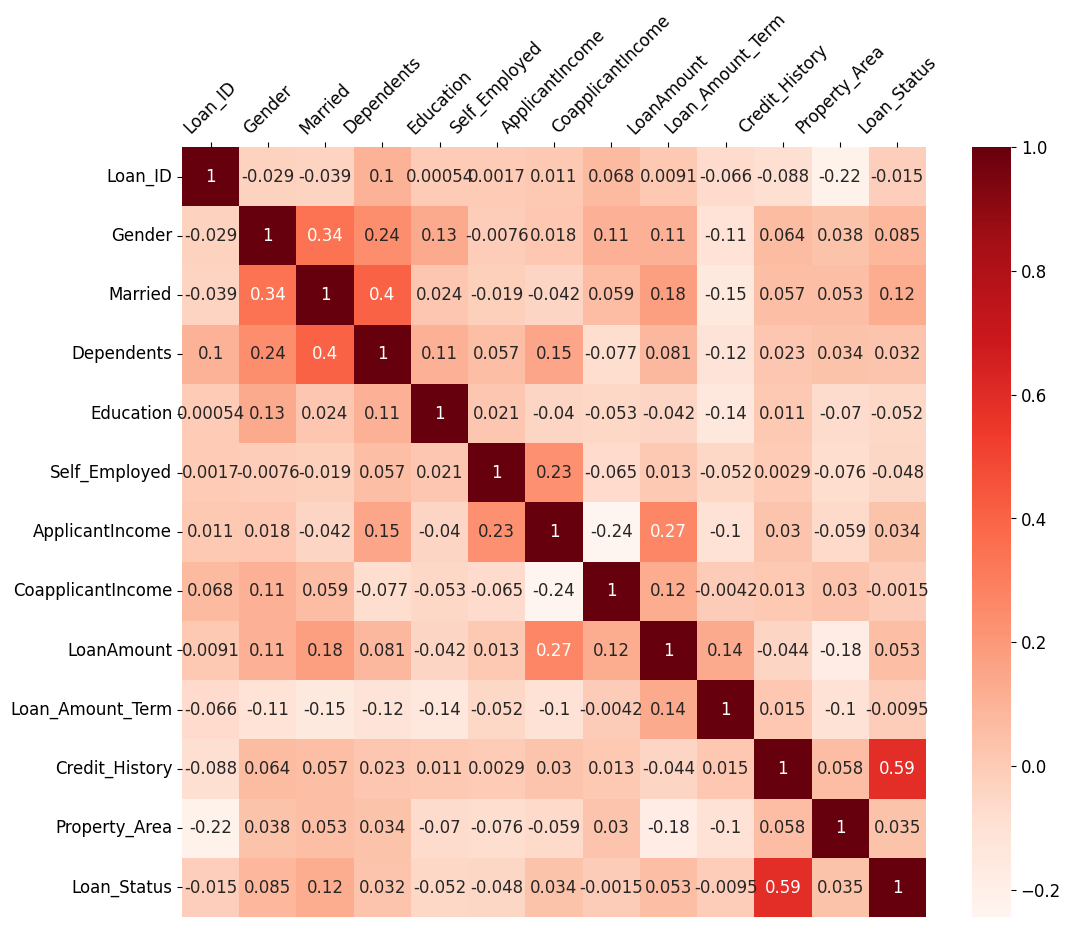

In [3]:
plt.figure(figsize=(12,10))
cor = df.corr()
g = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
g.axes.xaxis.set_ticks_position("top")
plt.setp(g.axes.get_xticklabels(), rotation=45)
plt.show()

In [4]:
# df.info()
# df.describe()

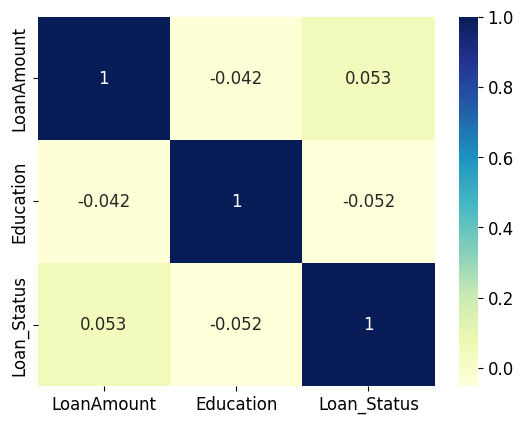

In [5]:
data = df[['LoanAmount', 'Education', 'Loan_Status']] 
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
plt.savefig('Confusion_matrix_LEL.png', bbox_inches='tight')

## Q2: Loan amounts

If you are a banker, will you give the loan to this person?

#### Loan amount vs Loan status

In [6]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

X = df.loc[:, 'LoanAmount' ].values
Y = df['Loan_Status'].values.reshape(-1,1)  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)


log_reg = sm.Logit(y_train, X_train).fit() 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.607423
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  246
Model:                          Logit   Df Residuals:                      245
Method:                           MLE   Df Model:                            0
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                0.001087
Time:                        15:42:33   Log-Likelihood:                -149.43
converged:                       True   LL-Null:                       -149.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0081      0.001      6.142      0.000       0.005       0.011


#### LoanAmount vs Credit history vs Loan status

In [7]:
Selected_Feat_List = [ 'LoanAmount', 'Credit_History', 'Gender', 'Education'] #  'Gender', 'Education' 

X = df.loc[:, Selected_Feat_List].values
Y = df['Loan_Status'].values.reshape(-1,1)  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

import statsmodels.api as sm 
log_reg = sm.Logit(y_train, X_train).fit() 

print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.476945
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  246
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.2157
Time:                        15:42:33   Log-Likelihood:                -117.33
converged:                       True   LL-Null:                       -149.59
Covariance Type:            nonrobust   LLR p-value:                 6.353e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0122      0.004     -2.966      0.003      -0.020      -0.004
x2             2.9862      0.

## Q3-Q4 KNN, LDA, and QDA Classifiers 

In the following, settings will be used in KNN, LDA, and QDA implementation. 

Your target is to 
- find the best parameters for each algorithm. 
- analyze the performance of the algortihms

In [12]:
using_TWO_feature = True

if using_TWO_feature == True:

    feature_list = ['Credit_History', 'LoanAmount' ]    
    
else:
    feature_list =  [  'Gender', 'Married',  'LoanAmount', 'Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History' ] 

X = df.loc[:, feature_list ].values
Y = df['Loan_Status'].values.reshape(-1,1)  

X_train, X_test, y_train, y_test   = train_test_split(X, Y, test_size=0.2, random_state= 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state= 0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
Xscaler = MinMaxScaler()
X_train = Xscaler.fit_transform(X_train)
X_valid = Xscaler.transform(X_valid)
X_test = Xscaler.transform(X_test)
 

## Q3. KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score
import numpy as np

k_list = list(np.arange(1, 10, 2, dtype=int))
precision_list = []
recall_list = [] 

for k in k_list: 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train.reshape(-1))
    y_trainpred = neigh.predict(X_train) 

    y_validpred  = neigh.predict(X_valid)
    precision_   = precision_score(y_validpred.reshape(-1), y_valid.reshape(-1))
    recall_      = recall_score(y_validpred.reshape(-1), y_valid.reshape(-1)) 
    precision_list.append(precision_) 
    recall_list.append(recall_)  

### Q 3.1.1 What is the best $k$-based on Precision and Recall curve ?

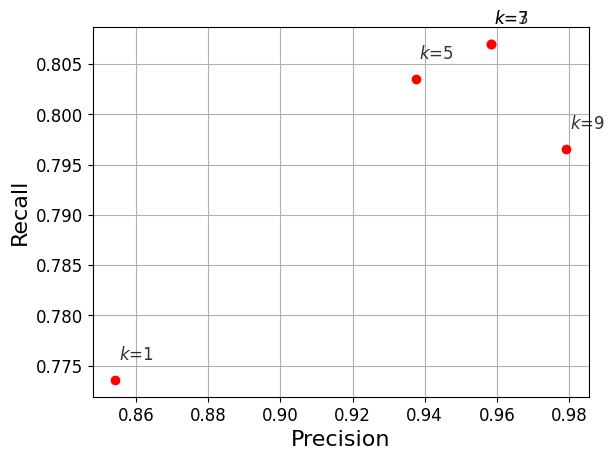

In [14]:
for i in range(len(k_list)):
    plt.text(precision_list[i]+0.001, recall_list[i]+0.002, r"$k$=%s" % str(k_list[i]),alpha=0.8)

plt.plot(precision_list, recall_list, 'o', color='red')   
plt.ylabel('Recall')  
plt.xlabel('Precision')  
plt.grid()
plt.savefig('k_vs_precision-recall.png', bbox_inches='tight')
plt.show()

### Q3.1.2 Compare the performance against LDA & QDA on validated sets

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd")

lda.fit(X_train, y_train.reshape(-1))
y_trainpred = lda.predict(X_train) 

y_validpred  = lda.predict(X_valid)
precision_   = precision_score(y_validpred.reshape(-1), y_valid.reshape(-1))
recall_      = recall_score(y_validpred.reshape(-1), y_valid.reshape(-1)) 

print("LDA: precision %f recall %f " % (precision_, recall_) ) 
precision_list.append(precision_)    
recall_list.append(recall_) 
k_list.append("LDA") 

LDA: precision 1.000000 recall 0.800000 


In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train.reshape(-1))
y_trainpred = qda.predict(X_train) 

y_validpred  = qda.predict(X_valid)
precision_   = precision_score(y_validpred.reshape(-1), y_valid.reshape(-1))
recall_      = recall_score(y_validpred.reshape(-1), y_valid.reshape(-1)) 

print("QDA: precision %f recall %f " % (precision_, recall_) ) 
precision_list.append(precision_)    
recall_list.append(recall_) 
k_list.append("QDA") 

QDA: precision 1.000000 recall 0.800000 


### 3.1.3 Which algorithm gives the best precision-recall trade-off ? 

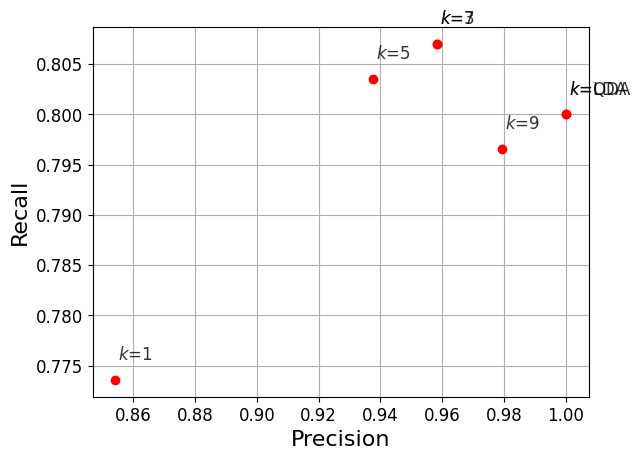

In [17]:
for i in range(len(k_list)):
    plt.text(precision_list[i]+0.001, recall_list[i]+0.002, r"$k$=%s" % str(k_list[i]),alpha=0.8)

plt.plot(precision_list, recall_list, 'o', color='red')   
plt.ylabel('Recall')  
plt.xlabel('Precision')  
plt.grid()
plt.savefig('k_vs_precision-recall.png', bbox_inches='tight')
plt.show()

## Q 3.1.4. Compare the confusion matrices of KNN the best $k$ vs. LDA and QDA 

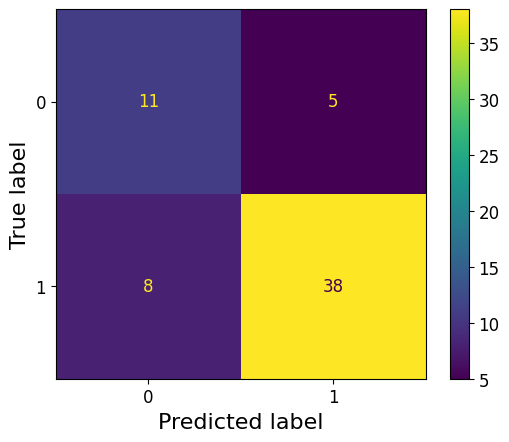

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.reshape(-1))
predictions = neigh.predict(X_test) 
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

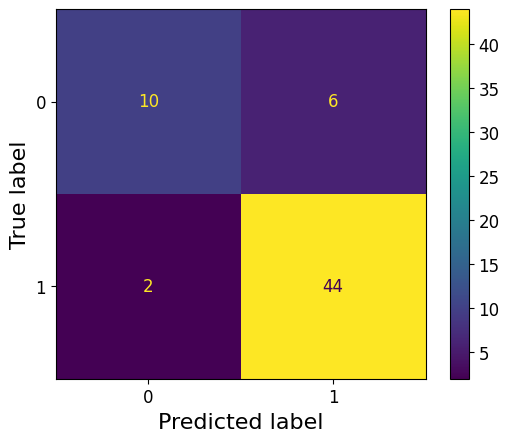

In [19]:
predictions = lda.predict(X_test) 
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

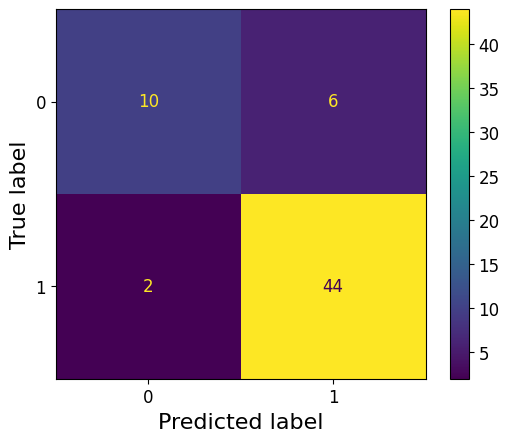

In [20]:
predictions = qda.predict(X_test) 
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

## Q5. LDA and QDA on the data distributions.

In [21]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay


def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.set(xticks=[], yticks=[])

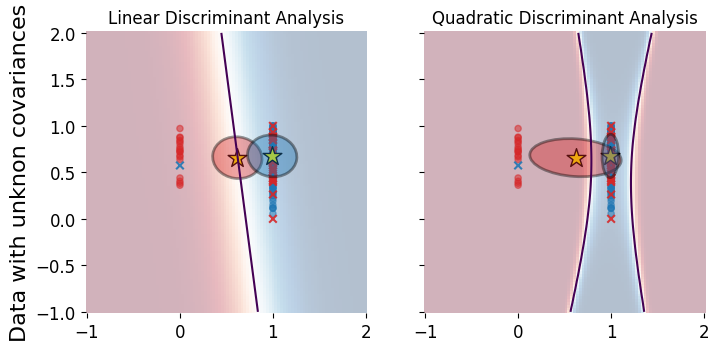

In [22]:
if using_TWO_feature == True:
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex="row", sharey="row", figsize=(8, 12))

    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)


    lda.fit(X_train, y_train.reshape(-1))
    plot_result(lda, X_train, y_train.reshape(-1), axs[0])
    qda.fit(X_train, y_train.reshape(-1))
    plot_result(qda, X_train, y_train.reshape(-1), axs[1])

    axs[0].set_title("Linear Discriminant Analysis")
    axs[1].set_title("Quadratic Discriminant Analysis")
    axs[0].set_ylabel("Data with unknon covariances")
    
    plt.savefig('LDA-QDA-boundary.png', bbox_inches='tight')

## Q.6 Experiment on single feature (Credit_History or LoanAmount)

In [23]:
using_Credit_History = True

if using_Credit_History == True:

    feature_list = ['Credit_History']    
    
else:
    feature_list = ['LoanAmount']      

X = df.loc[:, feature_list ].values
Y = df['Loan_Status'].values.reshape(-1,1)  

X_train, X_test, y_train, y_test   = train_test_split(X, Y, test_size=0.2, random_state= 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state= 0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
Xscaler = MinMaxScaler()
X_train = Xscaler.fit_transform(X_train)
X_valid = Xscaler.transform(X_valid)
X_test = Xscaler.transform(X_test)

In [24]:
lda.fit(X_train, y_train.reshape(-1))
y_trainpred = lda.predict(X_train) 

y_validpred  = lda.predict(X_valid)
precision_   = precision_score(y_validpred.reshape(-1), y_valid.reshape(-1))
recall_      = recall_score(y_validpred.reshape(-1), y_valid.reshape(-1)) 

print("LDA: precision %f recall %f " % (precision_, recall_) ) 
precision_list.append(precision_)    
recall_list.append(recall_) 
k_list.append("LDA") 

LDA: precision 1.000000 recall 0.800000 


In [25]:
qda.fit(X_train, y_train.reshape(-1))
y_trainpred = qda.predict(X_train) 

y_validpred  = qda.predict(X_valid)
precision_   = precision_score(y_validpred.reshape(-1), y_valid.reshape(-1))
recall_      = recall_score(y_validpred.reshape(-1), y_valid.reshape(-1)) 

print("QDA: precision %f recall %f " % (precision_, recall_) ) 
precision_list.append(precision_)    
recall_list.append(recall_) 
k_list.append("QDA") 

QDA: precision 1.000000 recall 0.800000 


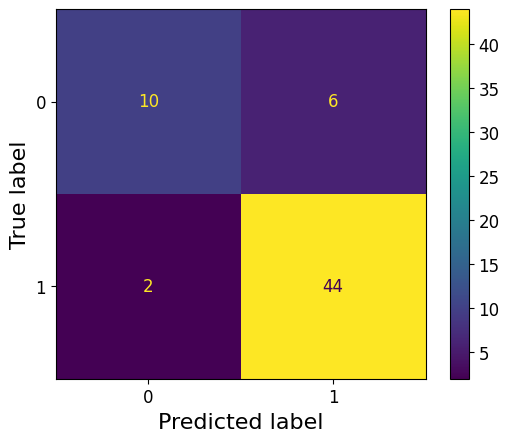

In [26]:
predictions = lda.predict(X_test) 
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

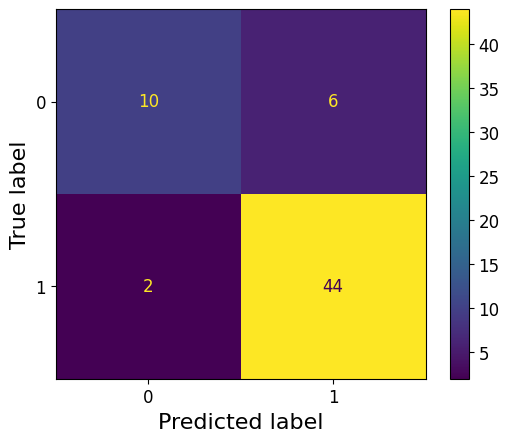

In [27]:
predictions = qda.predict(X_test) 
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()